In [1]:
# 블린저밴드
# 1. 파일로드
# 2. 결측치와 이상치 확인 및 거
# 3. 종가의 데이터만의 데이터프레임으로 변경
# 4. 이동 평균선 >> 데이터 20개의 평균을 구해서 새로운 파생변수에 대입 
# 5. 상단 밴드 : 이동 평균선 + (2*데이터 20개의 표준편차)
# 6. 하단 밴드 : 이동 평균선 - (2*데이터 20개의 표준편차)
# 7. 구매 상태 확인하는 파생변수 생성
# 8. 구매 상태 입력 
# 9. 수익율 계산 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sn

In [3]:
df = pd.read_csv("../../csv/BND.csv", index_col= "Date")
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-04-10,75.070000,75.260002,75.000000,75.239998,51.523693,35000
2007-04-11,75.160004,75.290001,75.029999,75.040001,51.386742,87700
2007-04-12,75.059998,75.080002,74.959999,75.029999,51.379879,78100
2007-04-13,75.040001,75.070000,74.849998,74.910004,51.297688,18000
2007-04-16,74.989998,74.989998,74.940002,74.980003,51.345627,52700


In [4]:
# 결측치와 이상치를 확인 

df[df.isin([np.nan, np.Inf, -np.inf]).any(1)]


C:\Users\이주노\AppData\Local\Temp\ipykernel_88956\3910624266.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  df[df.isin([np.nan, np.Inf, -np.inf]).any(1)]


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


In [5]:
# 결측치와 이상치를 제외한 데이터 생성

df = df[~df.isin([np.nan, np.Inf, -np.inf]).any(1)]
df.head()

C:\Users\이주노\AppData\Local\Temp\ipykernel_88956\763286153.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  df = df[~df.isin([np.nan, np.Inf, -np.inf]).any(1)]


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-04-10,75.070000,75.260002,75.000000,75.239998,51.523693,35000
2007-04-11,75.160004,75.290001,75.029999,75.040001,51.386742,87700
2007-04-12,75.059998,75.080002,74.959999,75.029999,51.379879,78100
2007-04-13,75.040001,75.070000,74.849998,74.910004,51.297688,18000
2007-04-16,74.989998,74.989998,74.940002,74.980003,51.345627,52700


In [6]:
# df.loc[:,["Adj Close"]]
price_df = df[["Adj Close"]]
price_df.head()

,Adj Close
Date,
2007-04-10,51.523693
2007-04-11,51.386742
2007-04-12,51.379879
2007-04-13,51.297688
2007-04-16,51.345627


In [7]:
# 이동 평균선 
# 데이터 20개의 평균을 구해서 파생변수 대입
# 과거의 데이터의 수가 20개가 되지 않으면 결측치로 출력

price_df["center"] = price_df["Adj Close"].rolling(20).mean()
price_df.head(20)


C:\Users\이주노\AppData\Local\Temp\ipykernel_88956\1639301608.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_df["center"] = price_df["Adj Close"].rolling(20).mean()


,Adj Close,center
Date,,
2007-04-10,51.523693,NaN
2007-04-11,51.386742,NaN
2007-04-12,51.379879,NaN
2007-04-13,51.297688,NaN
2007-04-16,51.345627,NaN
2007-04-17,51.475742,NaN
2007-04-18,51.571590,NaN
2007-04-19,51.551067,NaN
2007-04-20,51.537384,NaN


In [8]:
price_df.iloc[18:25]

,Adj Close,center
Date,,
2007-05-04,51.679100,NaN
2007-05-07,51.713379,51.556713
2007-05-08,51.720268,51.566542
2007-05-09,51.658497,51.580130
2007-05-10,51.706562,51.596464
2007-05-11,51.637943,51.613477
2007-05-14,51.603649,51.626378


In [9]:
# ub 파생변수 생성 
# 이동평균성 + (2*데이터 20개의 표준 편차)
price_df["ub"] = price_df["center"] + (2 * price_df["Adj Close"].rolling(20).std())


C:\Users\이주노\AppData\Local\Temp\ipykernel_88956\1885497591.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_df["ub"] = price_df["center"] + (2 * price_df["Adj Close"].rolling(20).std())


In [10]:
price_df["lb"] = price_df["center"] - (2 * price_df["Adj Close"].rolling(20).std())

C:\Users\이주노\AppData\Local\Temp\ipykernel_88956\2391251354.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_df["lb"] = price_df["center"] - (2 * price_df["Adj Close"].rolling(20).std())


In [11]:
price_df.iloc[18:25]

,Adj Close,center,ub,lb
Date,,,,
2007-05-04,51.679100,NaN,NaN,NaN
2007-05-07,51.713379,51.556713,51.807910,51.305517
2007-05-08,51.720268,51.566542,51.827492,51.305592
2007-05-09,51.658497,51.580130,51.829713,51.330546
2007-05-10,51.706562,51.596464,51.833301,51.359627
2007-05-11,51.637943,51.613477,51.804375,51.422579
2007-05-14,51.603649,51.626378,51.770106,51.482650


<AxesSubplot: xlabel='Date'>

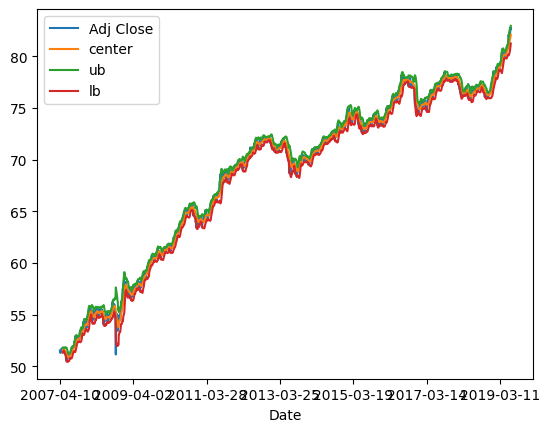

In [12]:
price_df.plot()

<AxesSubplot: xlabel='Date'>

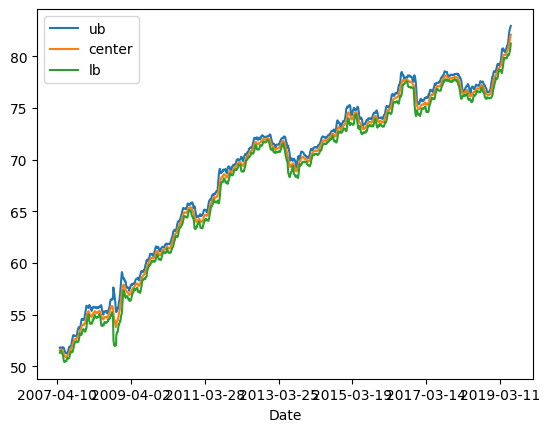

In [13]:
price_df[["ub","center", "lb"]].plot()

In [14]:
# 시작시간 생성
start_time = "2010-01-02"

price_df_2 = price_df.loc[start_time:]
price_df_2.head(3)

,Adj Close,center,ub,lb
Date,,,,
2010-01-04,60.611969,60.826958,61.336124,60.317793
2010-01-05,60.789135,60.819153,61.325461,60.312844
2010-01-06,60.766037,60.802128,61.290324,60.313932


In [15]:
# 거래 내역이라는 파생변수 생성 
# 비어있는 값으로 생성 
price_df_2["trade"] = "" 
price_df_2.head(2)

C:\Users\이주노\AppData\Local\Temp\ipykernel_88956\608590750.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_df_2["trade"] = ""


,Adj Close,center,ub,lb,trade
Date,,,,,
2010-01-04,60.611969,60.826958,61.336124,60.317793,
2010-01-05,60.789135,60.819153,61.325461,60.312844,


In [16]:
# 구매내역 추가 

# 조건 
    # 1.상단밴드 보다 종가가 높은 경우 
        # 현재 구매 상태인가 >> 매도 trade = ""
        # 현재 구매 상태가 아닌 경유 >> 아무 행동도 하지 않는다 >>>> trade = ""
    
    # 2. 하단밴드 보다 종가가 낮은 경우
        # 현재 구매 상태인가 >> 구매 상태 유지 >> trade = "buy"
        # 현재 구매 상태가 아니면 구매 >> 매수 trade = "buy"

    # 3. 하단밴드와 상단밴드 사이에 종가가 존재하는 경우
        # 현재 구매 상태인 경우 >>> 현 상태 유지 >> trade = "buy"
        # 현재 구매 상태가 아닌 경우 >>> 현 상태 유지 >> trade = "buy

In [17]:
for i in price_df_2.index : 
    if price_df_2.loc[i,"Adj Close"] > price_df_2.loc[i, "ub"] :

        if price_df_2.shift(1).loc[i,"trade"] == "buy" :
            price_df_2.loc[i,"trade"] = ""
        else:
            price_df_2.loc[i,"trade"] = ""

    elif price_df_2.loc[i,"Adj Close"] < price_df_2.loc[i, "lb"] :  

        if price_df_2.shift(1).loc[i,"trade"] == "buy" :
            price_df_2.loc[i,"trade"] = "buy"
        else :
            price_df_2.loc[i,"trade"] = "buy"

    elif price_df_2.loc[i,"Adj Close"] >= price_df_2.loc[i, "lb"] and\
         price_df_2.loc[i,"Adj Close"] <= price_df_2.loc[i, "ub"] :
         
        if price_df_2.shift(1).loc[i,"trade"] == "buy":
            price_df_2.loc[i,"trade"] = "buy"
        else :
            price_df_2.loc[i,"trade"] = ""
        



In [18]:
price_df_2["trade"].value_counts()

       1568
buy     816
Name: trade, dtype: int64

In [19]:
# price_df_2[price_df_2.isin(["buy"]).any(1)]
# price_df_2.query("trade == buy")
price_df_2[price_df_2["trade"] == "buy"]

,Adj Close,center,ub,lb,trade
Date,,,,,
2010-03-25,61.205368,61.569890,61.819734,61.320047,buy
2010-03-26,61.337158,61.560745,61.830838,61.290653,buy
2010-03-29,61.205368,61.541756,61.854636,61.228875,buy
2010-03-30,61.329365,61.526641,61.850257,61.203025,buy
2010-03-31,61.383640,61.513850,61.838911,61.188789,buy
...,...,...,...,...,...
2019-03-01,78.634193,78.905679,79.169995,78.641363,buy
2019-03-04,78.772850,78.907841,79.166744,78.648939,buy
2019-03-05,78.832283,78.916434,79.151029,78.681839,buy


In [20]:
# apply를 이용하여 구매 내역 추가 
def bol(x):
    close = x[0]
    ub = x[1]
    lb = x[2]
    trade = price_df_2.shift(1)[(price_df_2["Adj Close"] == close) & 
                    (price_df_2["ub"] == ub) & 
                    (price_df_2["lb"] == lb)]['trade'].values
    if close > ub:
        return ""
    elif close < lb:
        return 'buy'
    else:
        if trade == 'buy':
            return 'buy'
        else : 
            return ""


price_df_2[["Adj Close", 'ub', 'lb']].apply(bol, axis=1, raw=1).value_counts()

       1568
buy     816
dtype: int64

In [21]:
price_df_2

,Adj Close,center,ub,lb,trade
Date,,,,,
2010-01-04,60.611969,60.826958,61.336124,60.317793,
2010-01-05,60.789135,60.819153,61.325461,60.312844,
2010-01-06,60.766037,60.802128,61.290324,60.313932,
2010-01-07,60.719822,60.777802,61.228214,60.327389,
2010-01-08,60.781410,60.759625,61.175685,60.343565,
...,...,...,...,...,...
2019-06-18,82.397118,81.737070,82.743959,80.730181,
2019-06-19,82.676468,81.836350,82.799510,80.873191,
2019-06-20,82.806168,81.934650,82.870640,80.998661,


In [22]:
def bol(x):
    close = x[0]
    ub = x[1]
    lb = x[2]
    trade = price_df_2.shift(1)[(price_df_2["Adj Close"] == close) & 
                    (price_df_2["ub"] == ub) & 
                    (price_df_2["lb"] == lb)]['trade'].values
    if close > ub:
        return ""
    elif close < lb:
        return 'buy'
    else:
        if trade == 'buy':
            return 'buy'
        else : 
            return ""


price_df_2[["Adj Close", 'ub', 'lb']].apply(bol, axis=1, raw=1).value_counts()

       1568
buy     816
dtype: int64

In [23]:
# 수익율 계산 
# .구매를 한 날의 종가
    #  trade 컬럼에서 전 행의 trade가 "" 현재 행 trade가 "buy"인 날의 종가 = 구매 가격

# 판매를 한 날의 종가
#     전 행의 trade가 "buy"이고 현재 행 trade가 "" 인 날의 종가 = 판매 가격

# # 수익율 계산
    # (판매 가격 - 구매 가격) / 구매 가격 + 1

# 구매 가격과 판매 가격를 초기화

# 여러개의 수익율 발생

# 누적 수익율
    # 수익율 누적으로 곱

In [24]:
# 손익 계산
rtn = 1.0
price_df_2["return"] = 1
buy = 0.0
sell = 0.0
for i in price_df_2.index:
    ## 구매가를 출력
    if price_df_2.shift(1).loc[i, "trade"] == '' and \
        price_df_2.loc[i, 'trade'] == 'buy':
        buy = price_df_2.loc[i, 'Adj Close']
        print('진입일 :', i, "구매 가격 :", buy)
    ## 판매가를 출력
    elif price_df_2.shift(1).loc[i, 'trade'] == 'buy' and \
        price_df_2.loc[i, 'trade'] == '':
        sell = price_df_2.loc[i, 'Adj Close']
        rtn = (sell - buy) / buy + 1
        price_df_2.loc[i, 'return'] = rtn
        print('청산일 :', i, "판매 가격 :", sell, "수익율 :", round(rtn, 4))
    
    ## buy, sell 변수를 초기화
    if price_df_2.loc[i, 'trade'] == "":
        buy = 0.0
        sell = 0.0
    
    


## for문을 이용하여 구매 가격 print, 판매 가격 print()
# 구매인 경우 조건 : 전 행의 trade가 "" 이고(그리고) 현재 행의 trade가 "buy"
# 판매인 경우 조건 : 전 행의 trade가 "buy" 이고(그리고) 현재 행의 trade가 ""
# 이 두 경우에 종가를 print()

C:\Users\이주노\AppData\Local\Temp\ipykernel_88956\2700673193.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_df_2["return"] = 1


진입일 : 2010-03-25 구매 가격 : 61.205368
청산일 : 2010-05-04 판매 가격 : 62.186432 수익율 : 1.016
진입일 : 2010-09-10 구매 가격 : 64.517815
청산일 : 2010-09-28 판매 가격 : 65.29863 수익율 : 1.0121
진입일 : 2010-11-12 구매 가격 : 64.902885
청산일 : 2011-03-16 판매 가격 : 65.105652 수익율 : 1.0031
진입일 : 2011-06-29 구매 가격 : 66.049957
청산일 : 2011-08-01 판매 가격 : 67.197464 수익율 : 1.0174
진입일 : 2011-11-30 구매 가격 : 68.584297
청산일 : 2011-12-13 판매 가격 : 69.032143 수익율 : 1.0065
진입일 : 2012-03-14 구매 가격 : 69.140411
청산일 : 2012-04-10 판매 가격 : 70.015167 수익율 : 1.0127
진입일 : 2012-08-15 구매 가격 : 71.121567
청산일 : 2013-02-25 판매 가격 : 71.270378 수익율 : 1.0021
진입일 : 2013-05-10 구매 가격 : 71.452927
청산일 : 2013-09-18 판매 가격 : 69.627502 수익율 : 0.9745
진입일 : 2013-12-24 구매 가격 : 69.648918
청산일 : 2014-02-03 판매 가격 : 70.937912 수익율 : 1.0185
진입일 : 2014-09-10 구매 가격 : 72.17923
청산일 : 2014-10-01 판매 가격 : 72.65773 수익율 : 1.0066
진입일 : 2015-02-17 구매 가격 : 73.605263
청산일 : 2015-03-18 판매 가격 : 74.53598 수익율 : 1.0126
진입일 : 2015-04-28 구매 가격 : 74.316902
청산일 : 2015-07-08 판매 가격 : 73.50975 수익율 : 0.9891
진입일 : 2015

In [25]:
price_df_2

,Adj Close,center,ub,lb,trade,return
Date,,,,,,
2010-01-04,60.611969,60.826958,61.336124,60.317793,,1.0
2010-01-05,60.789135,60.819153,61.325461,60.312844,,1.0
2010-01-06,60.766037,60.802128,61.290324,60.313932,,1.0
2010-01-07,60.719822,60.777802,61.228214,60.327389,,1.0
2010-01-08,60.781410,60.759625,61.175685,60.343565,,1.0
...,...,...,...,...,...,...
2019-06-18,82.397118,81.737070,82.743959,80.730181,,1.0
2019-06-19,82.676468,81.836350,82.799510,80.873191,,1.0
2019-06-20,82.806168,81.934650,82.870640,80.998661,,1.0


In [26]:
price_df_2["return"].value_counts()

1.000000    2365
1.016029       1
1.000661       1
1.010628       1
0.988025       1
1.019373       1
0.978149       1
1.002046       1
0.989139       1
1.012645       1
1.006629       1
1.018507       1
0.974453       1
1.002092       1
1.012652       1
1.006530       1
1.017373       1
1.003124       1
1.012102       1
1.007935       1
Name: return, dtype: int64

In [27]:
##누적 수익율

acc_rtn = 1.0

for i in price_df_2.index:
    rtn = price_df_2.loc[i, 'return']
    acc_rtn *= rtn
    price_df_2['acc_rtn'] = acc_rtn

print("누적 수익율 : ", round(acc_rtn, 4))

C:\Users\이주노\AppData\Local\Temp\ipykernel_88956\1716901061.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_df_2['acc_rtn'] = acc_rtn


누적 수익율 :  1.0794


In [28]:
# 볼린저 밴드를 함수화
# 1번 함수 생성
# 매개변수 데이터프레임, 기준이되는 컬럼명, 시작 시간 생성
# 데이터프레임의 결측치와 이상치를 제거
# 기준되는 컬럼만 두고 나머지 컬럼은 삭제
# 이동 평균선, 상단 밴드, 하단 밴드 파생 변수 생성
# 시작 시간부터 마지막 시간까지 데이터프레임을 필터링 한 데이터프레임을 리턴
# 2번 함수 생성
# 매개변수 데이터프레임 생성
# trade 컬럼을 생성 -> 값 ""
# 구매내역을 trade 컬럼 대입 후 데이터프레임 리턴
# 3번 함수 생성
# 매개변수 데이터프레임 생성
# return 컬럼을 생성 -> 값 1
# 손익 계산을 하여 return 컬럼에 대입
# 누적 수익율 acc_rtn 파생변수를 생성 누적 수익율 대입
# 누적 수익율 리턴
# 위의 내용이 잘 안되는 분들은
# 함수를 생성
# 매개변수 3개 (데이터프레임, 시작 시간, 컬럼명)
# 데이터프레임에서 해당하는 컬럼명만 있는 데이터프레임 생성 (loc, [[]])
# 시작 시간부터 마지막 데이터까지(loc[행의 조건, 열의 조건]) 출력이되는 데이터프레임을 리턴

In [29]:
def test(data, start, col):
    result = data.loc[start : , [col]]
    return result


df = pd.read_csv("../../csv/AAPL.csv", index_col='Date')

test(df, '2010-01-01', 'Adj Close')

,Adj Close
Date,
2010-01-04,26.782711
2010-01-05,26.829010
2010-01-06,26.402260
2010-01-07,26.353460
2010-01-08,26.528664
...,...
2019-06-18,198.449997
2019-06-19,197.869995
2019-06-20,199.460007


In [30]:
### 1번 함수 
def first(data, col, start):
    ## data : 데이터프레임, col : 컬럼의 이름, start : 시간

    ## 결측치 , 이상치를 제거
    result = data[~data.isin([np.nan, np.inf, -np.inf]).any(1)]
    ## 해당 컬럼만 남기고 나머지 컬럼은 삭제
    result = result.loc[:, [col]]
    ## 이동 평균선, 상단 밴드, 하단 밴드 생성
    result['center'] = result[col].rolling(20).mean()
    result['ub'] = result['center'] + ( 2 * result[col].rolling(20).std() )
    result['lb'] = result['center'] - ( 2 * result[col].rolling(20).std() )

    result = result.loc[start :]

    return result

In [31]:
df = pd.read_csv("../../csv/AAPL.csv", index_col='Date')

In [32]:
price_df = first(df, 'Close' ,'2010-01-01')

C:\Users\이주노\AppData\Local\Temp\ipykernel_88956\3922614676.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  result = data[~data.isin([np.nan, np.inf, -np.inf]).any(1)]


In [33]:
## 2번 함수 
def second(data, col):
    ## trade 컬럼을 추가 안에 들어가는 값은 ""
    result = data
    result["trade"] = ""
    ## trade에 거래 내역 추가
    for i in result.index:
        if result.loc[i, col] > result.loc[i, 'ub']:
            if result.shift(1).loc[i, 'trade'] == "buy":
                result.loc[i, 'trade'] = ""
            else : 
                result.loc[i, 'trade'] = ""
        elif result.loc[i, col] < result.loc[i, 'lb']:
            if result.shift(1).loc[i, 'trade'] == "buy":
                result.loc[i, 'trade'] = 'buy'
            else : 
                result.loc[i, 'trade'] = 'buy'
        elif result.loc[i, col] >= result.loc[i, 'lb'] and \
            result.loc[i, col] <= result.loc[i, 'ub']:
            if result.shift(1).loc[i, 'trade'] == 'buy':
                result.loc[i, 'trade'] = 'buy'
            else:
                result.loc[i, 'trade'] = ""
    return result

In [34]:
## 2번 함수 
## data에 들어가는 데이터프레임은
## 1번 함수를 실행 한 결과물
## 1번 함수를 실행 한 결과물에 컬럼은 -> 
## 
def second2(data):
    ## trade 컬럼을 추가 안에 들어가는 값은 ""
    result = data
    result["trade"] = ""
    col = result.columns[0]
    ## trade에 거래 내역 추가
    for i in result.index:
        if result.loc[i, col] > result.loc[i, 'ub']:
            if result.shift(1).loc[i, 'trade'] == "buy":
                result.loc[i, 'trade'] = ""
            else : 
                result.loc[i, 'trade'] = ""
        elif result.loc[i, col] < result.loc[i, 'lb']:
            if result.shift(1).loc[i, 'trade'] == "buy":
                result.loc[i, 'trade'] = 'buy'
            else : 
                result.loc[i, 'trade'] = 'buy'
        elif result.loc[i, col] >= result.loc[i, 'lb'] and \
            result.loc[i, col] <= result.loc[i, 'ub']:
            if result.shift(1).loc[i, 'trade'] == 'buy':
                result.loc[i, 'trade'] = 'buy'
            else:
                result.loc[i, 'trade'] = ""
    return result

In [35]:
price_df

,Close,center,ub,lb
Date,,,,
2010-01-04,30.572857,28.580929,30.874244,26.287614
2010-01-05,30.625713,28.731357,31.149766,26.312948
2010-01-06,30.138571,28.888643,31.239205,26.538081
2010-01-07,30.082857,29.036571,31.289988,26.783154
2010-01-08,30.282858,29.137857,31.425605,26.850109
...,...,...,...,...
2019-06-18,198.449997,185.432500,201.032574,169.832427
2019-06-19,197.869995,185.996000,202.558154,169.433846
2019-06-20,199.460007,186.830000,204.361771,169.298229


In [36]:
price_df = second(price_df, 'Adj Close')

KeyError: 'Adj Close'

In [ ]:
price_df.columns[0]

'Adj Close'

In [ ]:
second2(price_df)

,Adj Close,center,ub,lb,trade
Date,,,,,
2007-04-10,51.523693,NaN,NaN,NaN,
2007-04-11,51.386742,NaN,NaN,NaN,
2007-04-12,51.379879,NaN,NaN,NaN,
2007-04-13,51.297688,NaN,NaN,NaN,
2007-04-16,51.345627,NaN,NaN,NaN,
...,...,...,...,...,...
2019-06-18,82.397118,81.737070,82.743959,80.730181,
2019-06-19,82.676468,81.836350,82.799510,80.873191,
2019-06-20,82.806168,81.934650,82.870640,80.998661,


In [ ]:
## 3번 함수 생성
## 매개변수는 1개 
def third(data):
    result = data
    ## return 이라는 컬럼 생성 값은 1
    result['return'] = 1
    col = result.columns[0]
    rtn = 1.0
    buy = 0.0
    sell = 0.0
    for i in result.index:
        ## 구매가를 출력
        if result.shift(1).loc[i, "trade"] == '' and \
            result.loc[i, 'trade'] == 'buy':
            buy = result.loc[i, col]
            print('진입일 :', i, "구매 가격 :", buy)
        ## 판매가를 출력
        elif result.shift(1).loc[i, 'trade'] == 'buy' and \
            result.loc[i, 'trade'] == '':
            sell = result.loc[i, col]
            rtn = (sell - buy) / buy + 1
            result.loc[i, 'return'] = rtn
            print('청산일 :', i, "판매 가격 :", sell, "수익율 :", round(rtn, 4))
        
        ## buy, sell 변수를 초기화
        if result.loc[i, 'trade'] == "":
            buy = 0.0
            sell = 0.0
    
    acc_rtn = 1.0

    for i in result.index:
        rtn = result.loc[i, 'return']
        acc_rtn *= rtn
        result['acc_rtn'] = acc_rtn

    print("누적 수익율 : ", round(acc_rtn, 4))
    return result
    

In [ ]:
third(price_df)

진입일 : 2007-05-18 구매 가격 : 51.404739
청산일 : 2007-07-26 판매 가격 : 51.586227 수익율 : 1.0035
진입일 : 2008-02-13 구매 가격 : 54.925686
청산일 : 2008-09-08 판매 가격 : 56.093513 수익율 : 1.0213
진입일 : 2008-09-30 구매 가격 : 55.088211
청산일 : 2008-12-01 판매 가격 : 55.892693 수익율 : 1.0146
진입일 : 2009-01-21 구매 가격 : 57.360287
청산일 : 2009-03-18 판매 가격 : 57.678593 수익율 : 1.0055
진입일 : 2009-06-05 구매 가격 : 57.416809
청산일 : 2009-07-31 판매 가격 : 59.275059 수익율 : 1.0324
진입일 : 2009-12-22 구매 가격 : 60.6535
청산일 : 2010-05-04 판매 가격 : 62.186432 수익율 : 1.0253
진입일 : 2010-09-10 구매 가격 : 64.517815
청산일 : 2010-09-28 판매 가격 : 65.29863 수익율 : 1.0121
진입일 : 2010-11-12 구매 가격 : 64.902885
청산일 : 2011-03-16 판매 가격 : 65.105652 수익율 : 1.0031
진입일 : 2011-06-29 구매 가격 : 66.049957
청산일 : 2011-08-01 판매 가격 : 67.197464 수익율 : 1.0174
진입일 : 2011-11-30 구매 가격 : 68.584297
청산일 : 2011-12-13 판매 가격 : 69.032143 수익율 : 1.0065
진입일 : 2012-03-14 구매 가격 : 69.140411
청산일 : 2012-04-10 판매 가격 : 70.015167 수익율 : 1.0127
진입일 : 2012-08-15 구매 가격 : 71.121567
청산일 : 2013-02-25 판매 가격 : 71.270378 수익율 : 1.0021
진입일 : 2

,Adj Close,center,ub,lb,trade,return,acc_rtn
Date,,,,,,,
2007-04-10,51.523693,NaN,NaN,NaN,,1.0,1.175731
2007-04-11,51.386742,NaN,NaN,NaN,,1.0,1.175731
2007-04-12,51.379879,NaN,NaN,NaN,,1.0,1.175731
2007-04-13,51.297688,NaN,NaN,NaN,,1.0,1.175731
2007-04-16,51.345627,NaN,NaN,NaN,,1.0,1.175731
...,...,...,...,...,...,...,...
2019-06-18,82.397118,81.737070,82.743959,80.730181,,1.0,1.175731
2019-06-19,82.676468,81.836350,82.799510,80.873191,,1.0,1.175731
2019-06-20,82.806168,81.934650,82.870640,80.998661,,1.0,1.175731


In [ ]:
import bollinger as bol
import imp
imp.reload(bol)

ModuleNotFoundError: No module named 'bollinger'

In [ ]:
df = pd.read_csv("../csv/AMZN.csv", index_col='Date')

In [ ]:
## 클래스 생성
price_df = bol.Bollinger(df, 'Adj Close', '2010-01-01')

AttributeError: 'function' object has no attribute 'Bollinger'

In [ ]:
price_df.testing()

AttributeError: 'DataFrame' object has no attribute 'testing'